# Creating New VPatients

The goal of this work is to create a wider variety of patients so that we can make a larger dataset for our meal detection benchmark.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import sqrtm

In [2]:
# Load your data
df = pd.read_csv('/home/cjrisi/Projects/diabetes/simglucose/simglucose/params/vpatient_params.csv')

# Define a function to categorize the rows
def categorize_patient(row):
    prefix = row['Name'][:5]
    if prefix in ['adult', 'adole', 'child']:  # Replace 'group1', 'group2', 'group3' with actual prefixes
        return prefix
    else:
        return 'other'

# Apply the function to create a new column
df['category'] = df.apply(categorize_patient, axis=1)

# Separate the DataFrame into subsets
df_adult = df[df['category'] == 'adult']
df_adole = df[df['category'] == 'adole']
df_child = df[df['category'] == 'child']

In [3]:
df_child

,Name,i,x0_ 1,x0_ 2,x0_ 3,x0_ 4,x0_ 5,x0_ 6,x0_ 7,x0_ 8,...,ksc,ka1,ka2,dosekempt,u2ss,isc1ss,isc2ss,kp1,patient_history,category
20,child#001,100,0,0,0,271.031853,137.601359,7.395938,0,110.364808,...,0.0684,0.0041,0.0243,90000,1.142204,66.407184,35.799757,4.165283,0,child
21,child#002,16,0,0,0,264.366111,384.348663,3.905690,0,104.335158,...,0.0617,0.0033,0.0120,90000,1.384702,68.890632,96.446884,8.243337,0,child
22,child#003,41,0,0,0,233.426051,90.136540,5.595192,0,96.386533,...,0.0678,0.0081,0.0275,90000,0.700386,26.834698,17.564529,4.009837,0,child
23,child#004,61,0,0,0,276.767872,340.969887,7.524052,0,124.049699,...,0.1077,0.0042,0.0193,90000,1.386109,67.286844,57.176385,4.403875,0,child
24,child#005,62,0,0,0,256.487997,92.951746,4.340915,0,119.291148,...,0.1244,0.0037,0.0199,90000,1.363189,58.255924,57.670438,3.934054,0,child
25,child#006,64,0,0,0,242.193131,102.965023,5.992284,0,100.422080,...,0.0943,0.0040,0.0201,90000,0.985487,47.152494,39.645629,4.760733,0,child
26,child#007,68,0,0,0,231.016603,114.376710,7.737194,0,104.493575,...,0.0792,0.0035,0.0143,90000,1.025921,51.553843,59.124687,5.567987,0,child
27,child#008,88,0,0,0,307.226607,74.441426,5.315064,0,100.694629,...,0.1064,0.0024,0.0103,90000,1.432733,82.340967,119.914030,5.466196,0,child
28,child#009,89,0,0,0,260.782139,378.358611,5.431976,0,107.089888,...,0.0888,0.0047,0.0268,90000,1.101554,54.532387,31.539254,8.923043,0,child
29,child#010,100,0,0,0,247.420086,118.336141,6.568773,0,105.294530,...,0.0947,0.0032,0.0172,90000,1.128912,60.048503,54.462596,4.822584,0,child


In [4]:
df[[ 'ke1', 'ke2', 'Fsnc', 'dosekempt']]

,ke1,ke2,Fsnc,dosekempt
0,0.0005,339,1,90000
1,0.0005,339,1,90000
2,0.0005,339,1,90000
3,0.0005,339,1,90000
4,0.0005,339,1,90000
5,0.0005,339,1,90000
6,0.0005,339,1,90000
7,0.0005,339,1,90000
8,0.0005,339,1,90000
9,0.0005,339,1,90000


In [5]:
df.columns[15:-1]

Index(['BW', 'EGPb', 'Gb', 'Ib', 'kabs', 'kmax', 'kmin', 'b', 'd', 'Vg', 'Vi',
       'Ipb', 'Vmx', 'Km0', 'k2', 'k1', 'p2u', 'm1', 'm5', 'CL', 'HEb', 'm2',
       'm4', 'm30', 'Ilb', 'ki', 'kp2', 'kp3', 'f', 'Gpb', 'ke1', 'ke2',
       'Fsnc', 'Gtb', 'Vm0', 'Rdb', 'PCRb', 'kd', 'ksc', 'ka1', 'ka2',
       'dosekempt', 'u2ss', 'isc1ss', 'isc2ss', 'kp1', 'patient_history'],
      dtype='object')

In [6]:
keep_columns = ['BW', 'EGPb', 'Gb', 'Ib', 'kabs', 'kmax', 'kmin',
                'b', 'd', 'Vg', 'Vi', 'Ipb', 'Vmx', 'Km0', 'k2', 'k1',
                'p2u', 'm1', 'm5', 'CL', 'm2', 'm4', 'm30',
                'Ilb', 'ki', 'kp2', 'kp3', 'Gpb', 'Gtb',
                'Vm0', 'Rdb', 'PCRb', 'kd', 'ksc', 'ka1', 'ka2',
                'u2ss', 'isc1ss', 'isc2ss', 'kp1']

In [7]:
normal_dist_columns = ['BW', 'Gb', 'Ib', 'Vg', 'lpb', 'Km0', 'Gpb', 'isc2ss']
uniform_dist_columns = ['EGPb', 'kmax', 'kmin', 'b', 'd', 'k2', 'p2u', 'CL', 'm2','m5','Ilb','kd', 'ka1', 'ka2']
skew_dist_columns = ['kabs', 'Vi', 'Vmx', 'k1', 'm1', 'm5', 'm30', 'ki', 'kp2', 'kp3', 'Gtb', 'Vm0', 'Rdb', 'PCRb', 'ksc','u2ss','isc1ss', 'kp1']

In [8]:
corr_adult = df_adult[keep_columns].corr()
corr_adole = df_adole[keep_columns].corr()
corr_child = df_child[keep_columns].corr()

### Correlations For Adults

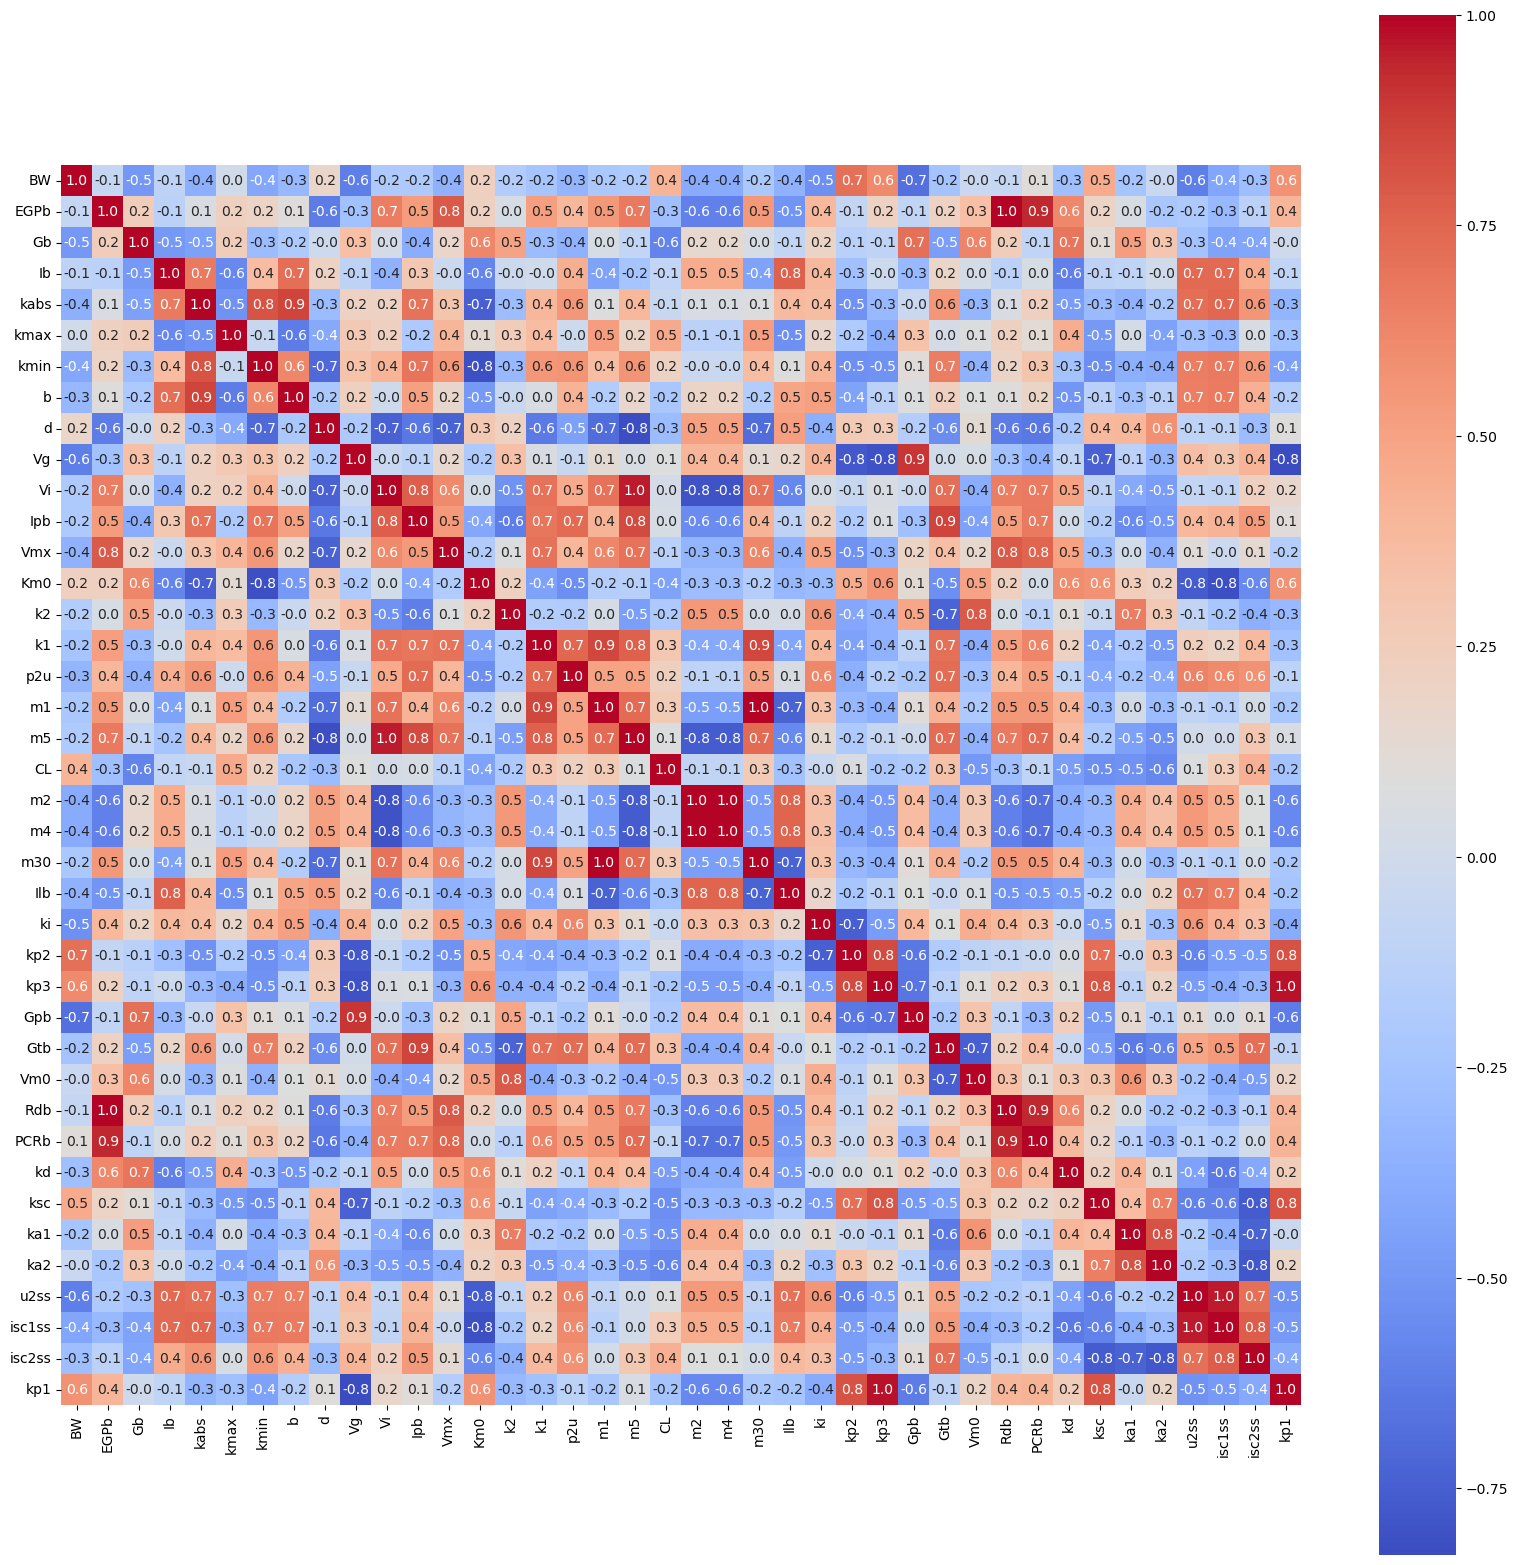

In [9]:
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
sns.heatmap(corr_adult, annot=True, fmt='.1f', cmap='coolwarm', square=True)
plt.show()

### Correlations for Adolescents

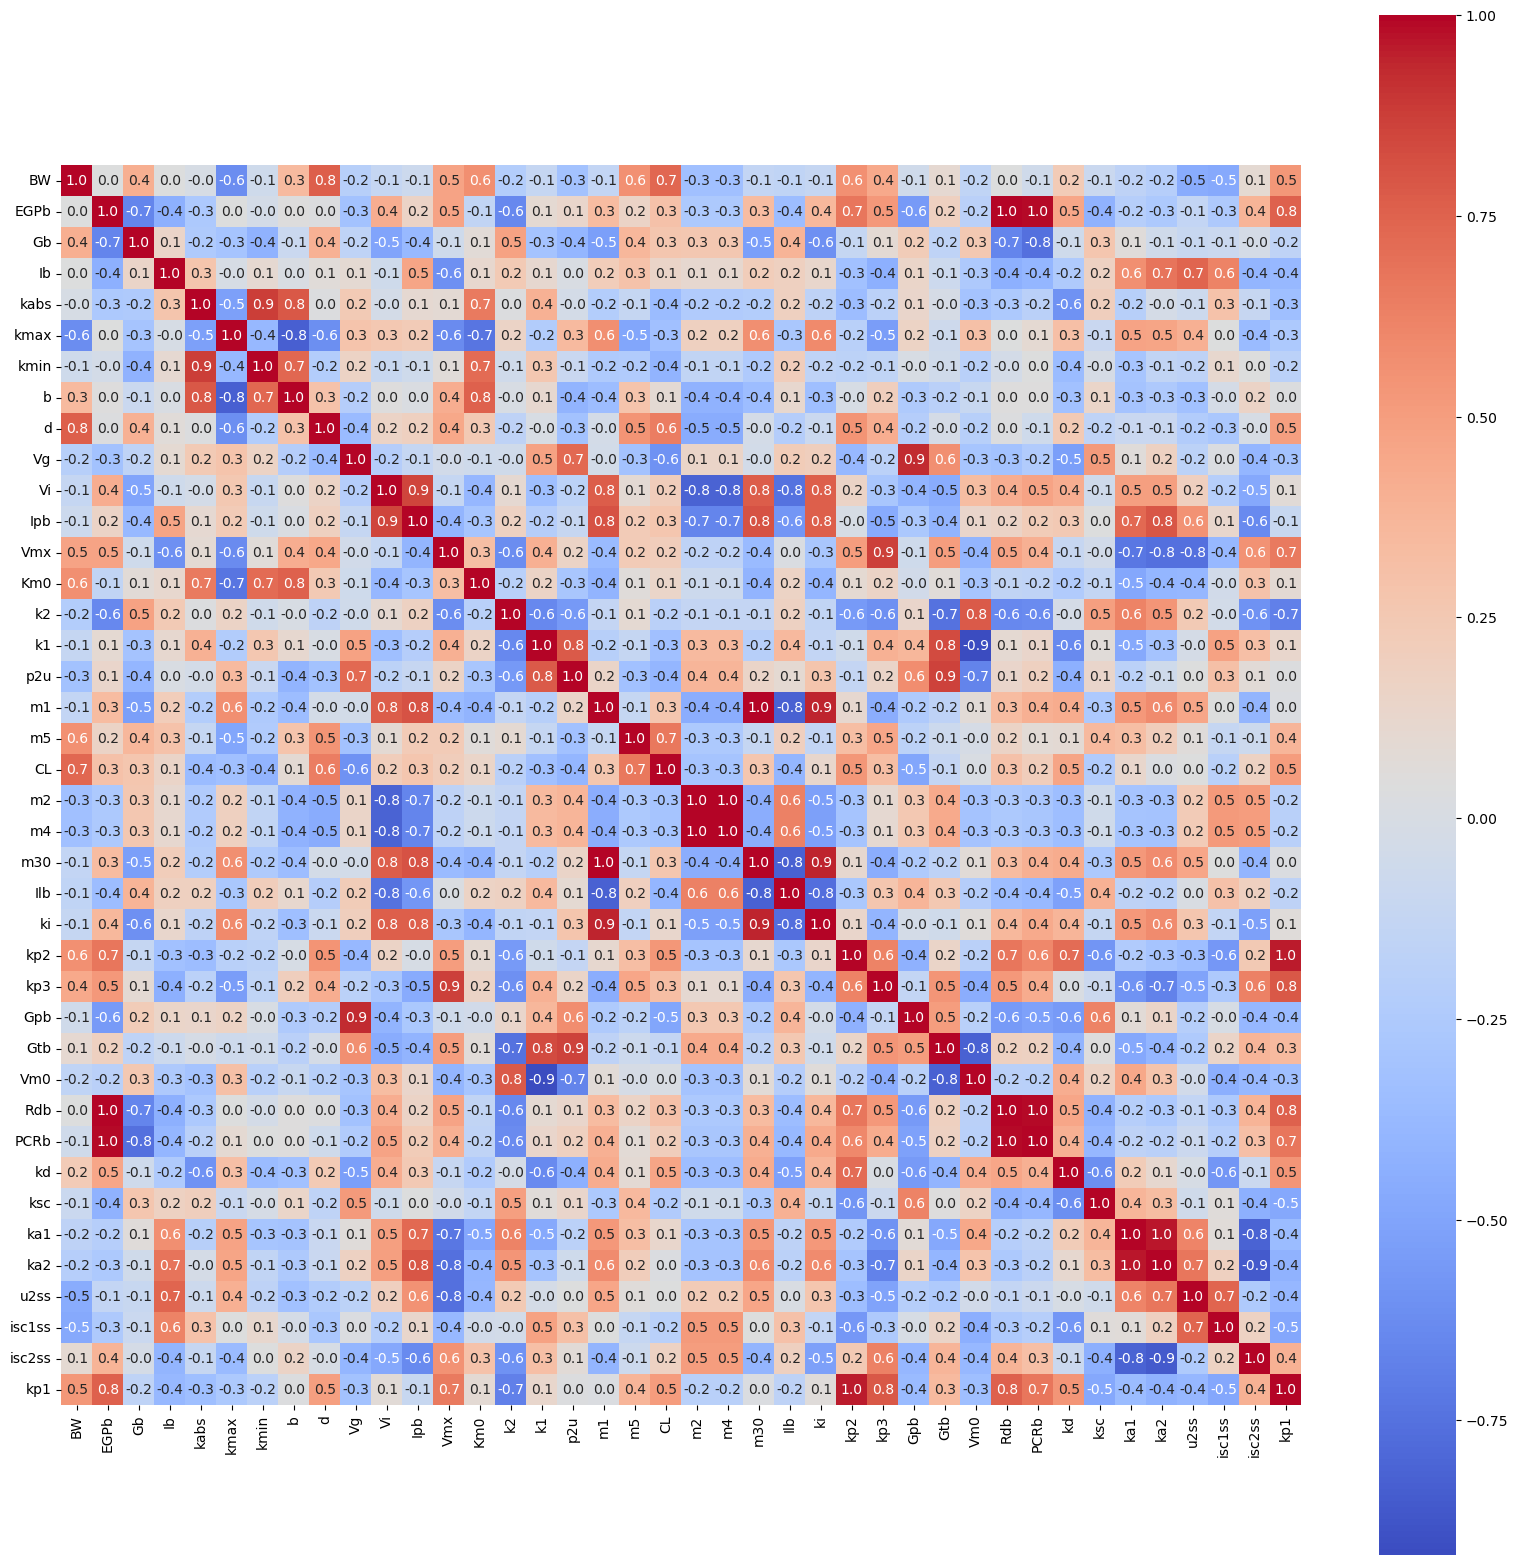

In [10]:
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
sns.heatmap(corr_adole, annot=True, fmt='.1f', cmap='coolwarm', square=True)
plt.show()

### Correlations for Children

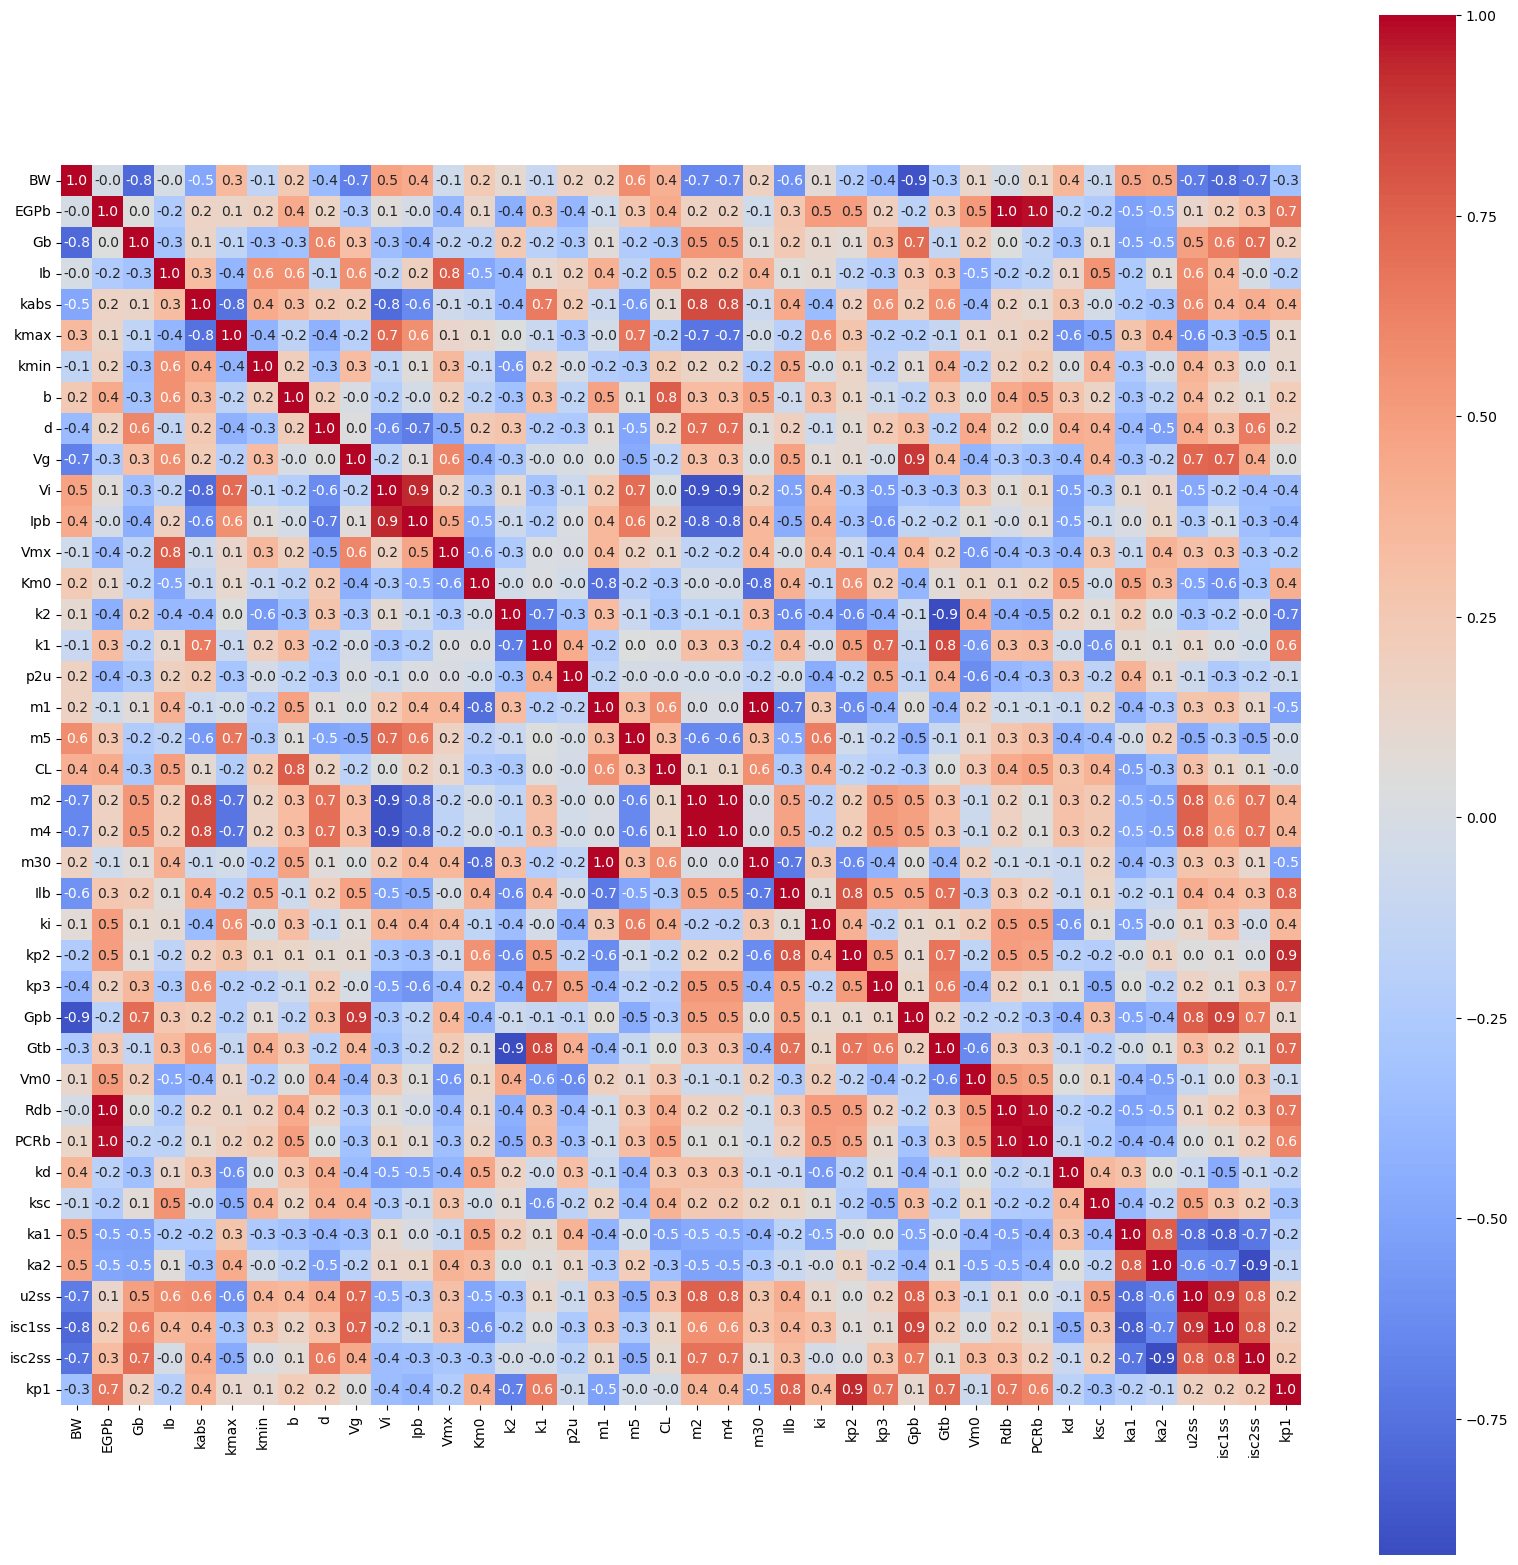

In [11]:
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
sns.heatmap(corr_child, annot=True, fmt='.1f', cmap='coolwarm', square=True)
plt.show()

### New Correlated Data Generation

In [12]:
sqrt_corr_matrix = sqrtm(corr_adult) # Use sqrt of corr matrix because Cholesky decomposition is not possible

# Generate uncorrelated random samples
num_samples = 333  # Number of samples you want to generate
uncorrelated_samples_normal = np.random.normal(size=(num_samples, len(normal_dist_columns)))
uncorrelated_samples_uniform = np.random.uniform(size=(num_samples, len(uniform_dist_columns)))
uncorrelated_samples_gamma = np.random.gamma(2, size=(num_samples, len(skew_dist_columns)))

uncorrelated_samples = np.concatenate([uncorrelated_samples_normal, uncorrelated_samples_uniform, uncorrelated_samples_gamma], axis=1)
uncorrelated_samples

array([[-0.55345027, -0.14610565, -0.11137919, ...,  1.79444326,
         0.25212521,  2.32624984],
       [-1.28191635,  0.73327404, -0.44384157, ...,  0.20168395,
         1.05170296,  3.82875773],
       [ 0.64160774,  0.89009347,  1.82811178, ...,  2.81885444,
         1.8508822 ,  0.88773644],
       ...,
       [-0.08362926, -0.43701298, -1.21951798, ...,  3.21229768,
         0.83416931,  1.39106899],
       [-0.54057635,  1.38136067,  0.54829293, ...,  0.64860371,
         0.99922026,  3.44136974],
       [-0.43251326,  0.48123402,  0.72630531, ...,  0.63933192,
         2.44727167,  1.04930642]])

In [13]:
uncorrelated_samples_gamma.min()

np.float64(0.01245746089593526)

In [14]:
# Transform the uncorrelated samples to have the same correlation structure
correlated_samples = uncorrelated_samples @ sqrt_corr_matrix

# Convert the correlated samples to a DataFrame
new_samples_df = pd.DataFrame(correlated_samples, columns=keep_columns)

# Display the first few rows of the new samples
new_samples_df

,BW,EGPb,Gb,Ib,kabs,kmax,kmin,b,d,Vg,...,Rdb,PCRb,kd,ksc,ka1,ka2,u2ss,isc1ss,isc2ss,kp1
0,-1.903424-0.000000j,5.832684+0.000000j,0.761831-0.000000j,1.506634+0.000000j,1.555116-0.000000j,0.218865-0.000000j,2.359644+0.000000j,1.810469+0.000000j,-3.685437+0.000000j,-2.494852-0.000000j,...,5.832684-0.000000j,5.620662-0.000000j,2.839019+0.000000j,0.611154+0.000000j,0.807260-0.000000j,-0.710042-0.000000j,1.754820+0.000000j,0.857702+0.000000j,0.449493-0.000000j,2.399090+0.000000j
1,-1.708040+0.000000j,3.392116-0.000000j,4.177264-0.000000j,-0.628030-0.000000j,-2.260751+0.000000j,0.376558-0.000000j,-1.216090-0.000000j,-0.200197-0.000000j,-0.979653-0.000000j,-1.764934+0.000000j,...,3.392117-0.000000j,1.931745-0.000000j,3.307035+0.000000j,2.158214-0.000000j,3.170028+0.000000j,2.019595+0.000000j,-0.164455+0.000000j,-1.155044+0.000000j,-2.344312+0.000000j,2.913785-0.000000j
2,-2.723863+0.000000j,3.383632-0.000000j,2.939481+0.000000j,0.568089+0.000000j,-0.465152+0.000000j,0.763534+0.000000j,0.422240+0.000000j,0.465361-0.000000j,-1.370161+0.000000j,-0.808672-0.000000j,...,3.383632+0.000000j,2.362401-0.000000j,2.921136-0.000000j,0.436993-0.000000j,3.030248+0.000000j,1.240565-0.000000j,1.303279+0.000000j,0.113923-0.000000j,-0.997568-0.000000j,0.883306-0.000000j
3,-0.452076-0.000000j,3.891502+0.000000j,1.298312-0.000000j,1.674515+0.000000j,-0.830639-0.000000j,-1.365285-0.000000j,-0.252431+0.000000j,-0.078164+0.000000j,-0.593587+0.000000j,-5.359920-0.000000j,...,3.891502-0.000000j,3.366581-0.000000j,3.344845+0.000000j,3.524192+0.000000j,1.496821-0.000000j,1.805475+0.000000j,0.668312+0.000000j,-0.156526+0.000000j,-1.116164-0.000000j,5.395711+0.000000j
4,-3.614802-0.000000j,4.274912+0.000000j,3.207905+0.000000j,1.817943+0.000000j,0.692736-0.000000j,0.045364-0.000000j,0.891140+0.000000j,2.105241+0.000000j,-1.614513+0.000000j,-0.213329-0.000000j,...,4.274912-0.000000j,3.191068-0.000000j,2.916738+0.000000j,0.056069+0.000000j,2.121402-0.000000j,0.122626-0.000000j,2.345143-0.000000j,1.004863+0.000000j,0.407925-0.000000j,1.065842+0.000000j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,-4.661660+0.000000j,1.473146-0.000000j,3.274286-0.000000j,1.979313+0.000000j,0.992228-0.000000j,-0.317884+0.000000j,1.968649+0.000000j,2.955094+0.000000j,-1.870449+0.000000j,1.724654-0.000000j,...,1.473146-0.000000j,0.261422-0.000000j,0.588135+0.000000j,-1.926702+0.000000j,0.661293-0.000000j,-0.457832-0.000000j,4.428749+0.000000j,3.610942+0.000000j,2.214105-0.000000j,-0.433573-0.000000j
329,-3.251150-0.000000j,4.147978+0.000000j,2.692845-0.000000j,0.885644+0.000000j,0.041995-0.000000j,0.452023-0.000000j,0.934949+0.000000j,0.533117+0.000000j,-1.847071+0.000000j,-1.579590-0.000000j,...,4.147978-0.000000j,3.183028-0.000000j,3.762438+0.000000j,0.486420+0.000000j,2.109240-0.000000j,0.593432-0.000000j,1.865279+0.000000j,0.596192+0.000000j,-0.019406-0.000000j,1.749501+0.000000j
330,-3.596840-0.000000j,2.417971+0.000000j,2.074604-0.000000j,1.008690+0.000000j,0.443006-0.000000j,-0.824729-0.000000j,-0.255571+0.000000j,0.497052+0.000000j,0.291645+0.000000j,-0.961940-0.000000j,...,2.417971-0.000000j,1.640456+0.000000j,2.944747+0.000000j,0.505399+0.000000j,2.188990-0.000000j,1.192869-0.000000j,1.982123+0.000000j,0.837783+0.000000j,0.236676-0.000000j,0.872535+0.000000j
331,-2.521382+0.000000j,5.767382-0.000000j,3.354850+0.000000j,1.045483+0.000000j,0.080126-0.000000j,0.176680+0.000000j,0.568754+0.000000j,1.356026+0.000000j,-2.200297+0.000000j,-1.835931-0.000000j,...,5.767382+0.000000j,4.681767-0.000000j,4.313541+0.000000j,1.646912+0.000000j,2.137573-0.000000j,0.371016-0.000000j,0.760157+0.000000j,-0.618190+0.000000j,-0.755016-0.000000j,2.886552-0.000000j


/home/cjrisi/anaconda3/envs/meal_identification/lib/python3.12/site-packages/pandas/core/internals/managers.py:1688: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.array(blk.values, dtype=dtype, copy=copy)


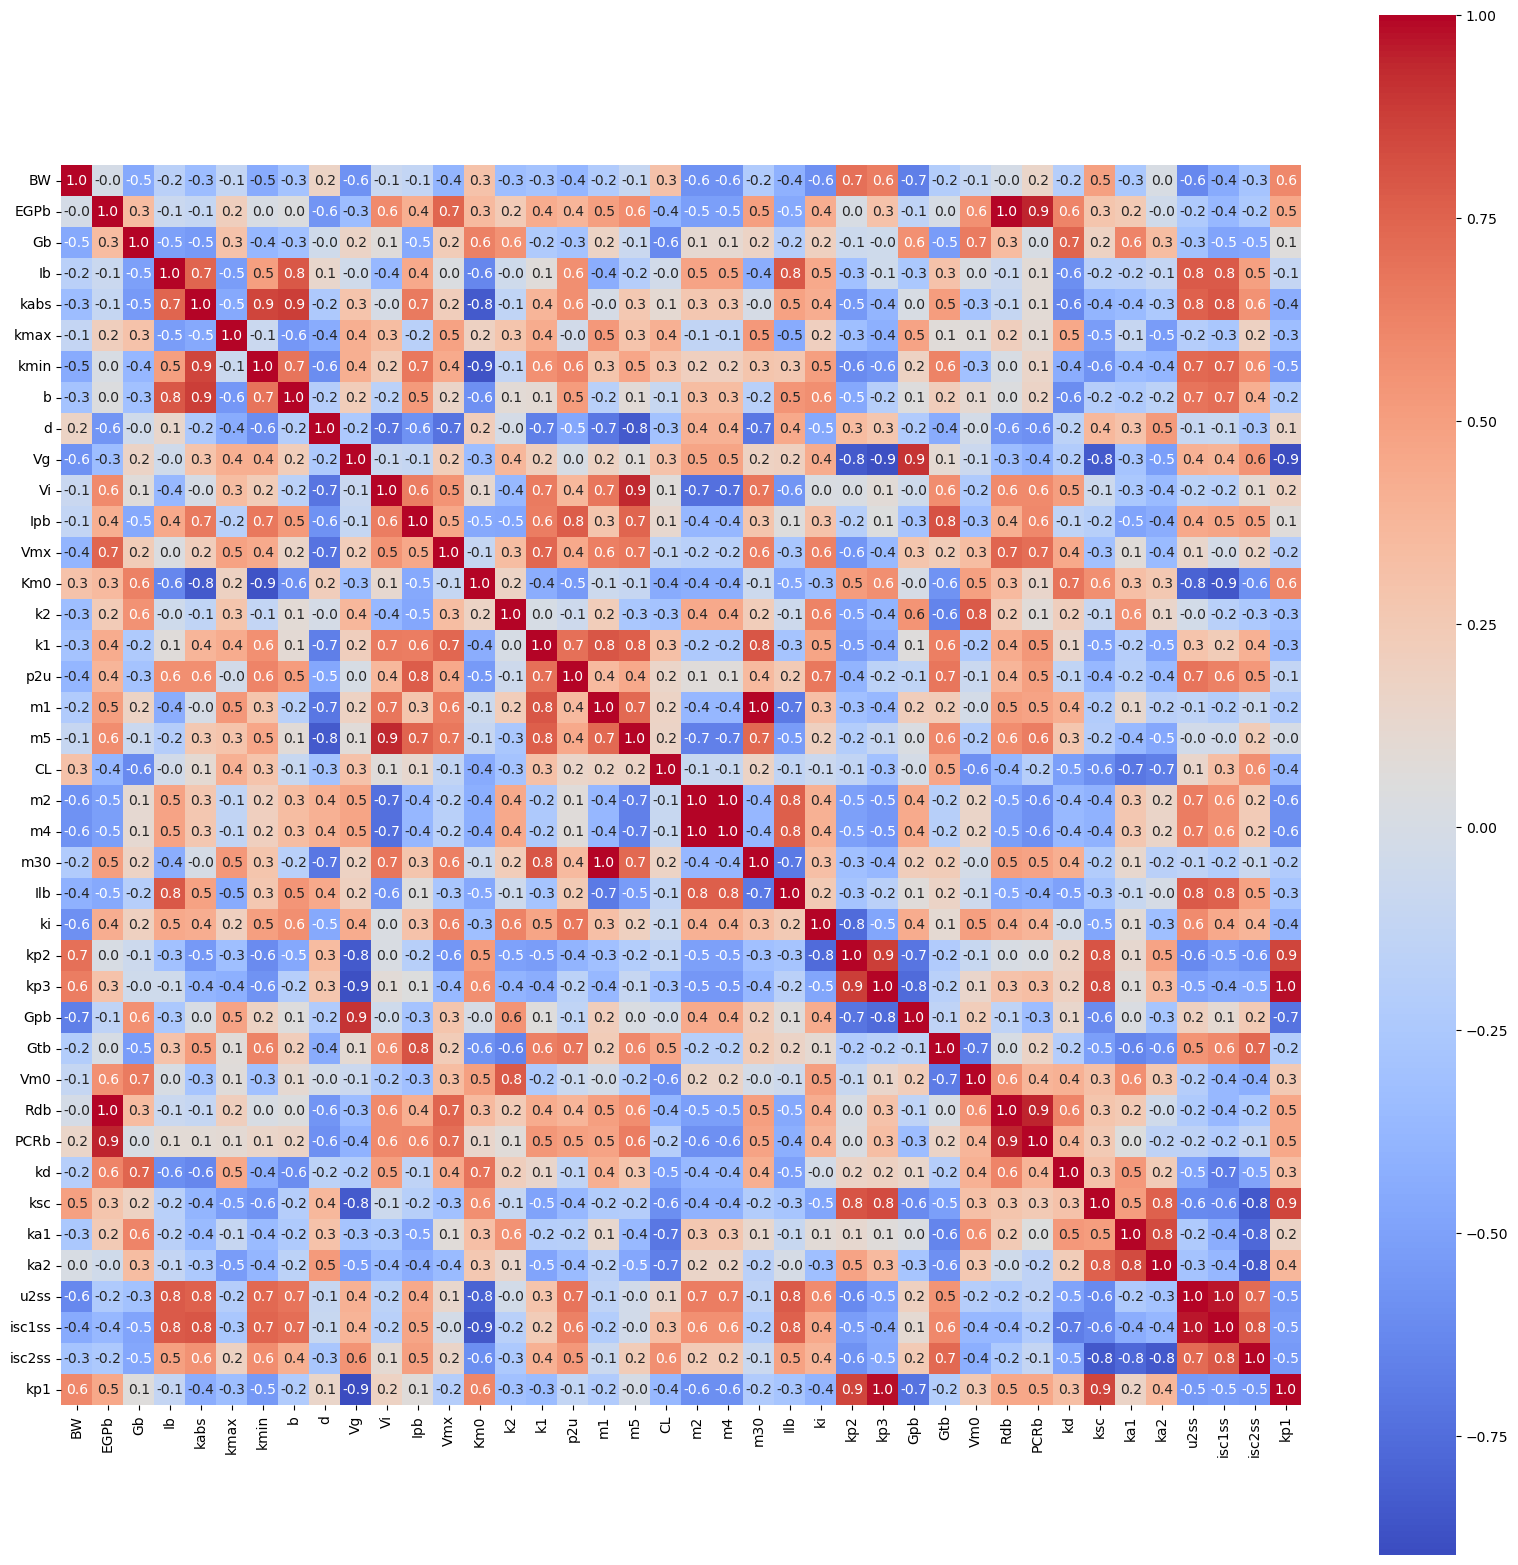

In [15]:
corr_adult_sim = new_samples_df.corr()

plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
sns.heatmap(corr_adult_sim, annot=True, fmt='.1f', cmap='coolwarm', square=True)
plt.show()

In [16]:
means = df_adult[keep_columns].mean()
stds = df_adult[keep_columns].std()

In [17]:
means


BW         86.070400
EGPb        2.507628
Gb        142.750888
Ib        108.461716
kabs        0.209655
kmax        0.038718
kmin        0.007393
b           0.785130
d           0.179066
Vg          1.847918
Vi          0.052523
Ipb         5.616447
Vmx         0.053689
Km0       236.731189
k2          0.129227
k1          0.062530
p2u         0.033878
m1          0.199938
m5          0.026563
CL          1.160246
m2          0.276541
m4          0.110616
m30         0.299907
Ilb         3.341286
ki          0.008433
kp2         0.004185
kp3         0.009514
Gpb       264.060544
Gtb       133.921436
Vm0         4.870793
Rdb         2.507628
PCRb        0.017575
kd          0.015920
ksc         0.095370
ka1         0.003370
ka2         0.015870
u2ss        1.500267
isc1ss     80.150358
isc2ss     86.412172
kp1         4.615304
dtype: float64

In [18]:
scaled_samples = correlated_samples * stds.values + means.values
scaled_samples

array([[ 54.39601704-1.03493877e-06j,   4.43501099+8.38790252e-09j,
        147.52285587-9.99108248e-08j, ..., 108.31268645+9.22690563e-07j,
        105.25888853-2.19520239e-06j,   6.99683442+3.03430013e-08j],
       [ 57.64735102+1.82664354e-07j,   3.62853672-2.52454567e-09j,
        168.91650888-2.09611419e-07j, ...,  42.22490902+1.80796050e-07j,
        -11.88204894+1.80025682e-07j,   7.50776236-5.75117820e-09j],
       [ 40.7432982 +5.09908423e-07j,   3.625733  -7.31325911e-09j,
        161.16326528+9.93498651e-08j, ...,  83.89099328-3.37194521e-07j,
         44.58531754-5.22821826e-08j,   5.49214555-1.14518724e-08j],
       ...,
       [ 26.2163081 -1.09995787e-06j,   3.30663486+1.01214728e-08j,
        155.7458274 -1.56417922e-07j, ..., 107.65866619+1.01460112e-06j,
         96.33569559-1.93908267e-06j,   5.48145291+2.93849189e-08j],
       [ 44.1127219 +9.04356971e-08j,   4.4134323 -1.50233647e-09j,
        163.76506073+2.66511666e-08j, ...,  59.85231655+4.33663804e-08j,
       

In [19]:
scaled_samples_df = pd.DataFrame(scaled_samples, columns=keep_columns)

In [20]:
scaled_samples_df

,BW,EGPb,Gb,Ib,kabs,kmax,kmin,b,d,Vg,...,Rdb,PCRb,kd,ksc,ka1,ka2,u2ss,isc1ss,isc2ss,kp1
0,54.396017- 0.000001j,4.435011+0.000000j,147.522856- 0.000000j,134.928736+ 0.000000j,0.528627-0.000000j,0.041228-0.000000j,0.016920+0.000000j,0.996106+0.000000j,-0.078764+0.000000j,1.502155-0.000000j,...,4.435011-0.000000j,0.030241-0.000000j,0.021569+0.000000j,0.111730+0.000000j,0.004001-0.000000j,0.012678-0.000000j,2.255228+0.000000j,108.312686+ 0.000001j,105.258889- 0.000002j,6.996834+0.000000j
1,57.647351+ 0.000000j,3.628537-0.000000j,168.916509- 0.000000j,97.429118- 0.000000j,-0.254052+0.000000j,0.043037-0.000000j,0.002484-0.000000j,0.761801-0.000000j,0.110530-0.000000j,1.603315+0.000000j,...,3.628537-0.000000j,0.021928-0.000000j,0.022501+0.000000j,0.153142-0.000000j,0.005848+0.000000j,0.024949+0.000000j,1.429515+0.000000j,42.224909+ 0.000000j,-11.882049+ 0.000000j,7.507762-0.000000j
2,40.743298+ 0.000001j,3.625733-0.000000j,161.163265+ 0.000000j,118.441325+ 0.000000j,0.114247+0.000000j,0.047475+0.000000j,0.009098+0.000000j,0.839359-0.000000j,0.083210+0.000000j,1.735844-0.000000j,...,3.625733+0.000000j,0.022899-0.000000j,0.021733-0.000000j,0.107068-0.000000j,0.005739+0.000000j,0.021447-0.000000j,2.060965+0.000000j,83.890993- 0.000000j,44.585318- 0.000000j,5.492146-0.000000j
3,78.547517- 0.000000j,3.793557+0.000000j,150.883279- 0.000000j,137.877896+ 0.000000j,0.039281-0.000000j,0.023059-0.000000j,0.006374+0.000000j,0.776021+0.000000j,0.137539+0.000000j,1.105084-0.000000j,...,3.793557-0.000000j,0.025162-0.000000j,0.022576+0.000000j,0.189707+0.000000j,0.004540-0.000000j,0.023986+0.000000j,1.787789+0.000000j,75.010883+ 0.000001j,39.612724- 0.000001j,9.971523+0.000000j
4,25.917403- 0.000001j,3.920253+0.000000j,162.844620+ 0.000000j,140.397501+ 0.000000j,0.351743-0.000000j,0.039238-0.000000j,0.010991+0.000000j,1.030456+0.000000j,0.066116+0.000000j,1.818353-0.000000j,...,3.920253-0.000000j,0.024766-0.000000j,0.021724+0.000000j,0.096871+0.000000j,0.005029-0.000000j,0.016421-0.000000j,2.509197-0.000000j,113.144692+ 0.000001j,103.515998- 0.000002j,5.673345+0.000000j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,8.496916+ 0.000000j,2.994422-0.000000j,163.260422- 0.000000j,143.232289+ 0.000000j,0.413172-0.000000j,0.035072+0.000000j,0.015341+0.000000j,1.129490+0.000000j,0.048211+0.000000j,2.086939-0.000000j,...,2.994422-0.000000j,0.018164-0.000000j,0.017090+0.000000j,0.043795+0.000000j,0.003887-0.000000j,0.013812-0.000000j,3.405608+0.000000j,198.714356+ 0.000000j,179.246954- 0.000001j,4.184904-0.000000j
329,31.968853- 0.000001j,3.878308+0.000000j,159.618377- 0.000000j,124.019806+ 0.000000j,0.218268-0.000000j,0.043903-0.000000j,0.011168+0.000000j,0.847254+0.000000j,0.049846+0.000000j,1.629002-0.000000j,...,3.878308-0.000000j,0.024748-0.000000j,0.023407+0.000000j,0.108391+0.000000j,0.005019-0.000000j,0.018538-0.000000j,2.302749+0.000000j,99.726106+ 0.000001j,85.598519- 0.000001j,6.352001+0.000000j
330,26.216308- 0.000001j,3.306635+0.000000j,155.745827- 0.000000j,126.181354+ 0.000000j,0.300520-0.000000j,0.029259-0.000000j,0.006361+0.000000j,0.843052+0.000000j,0.199469+0.000000j,1.714602-0.000000j,...,3.306635-0.000000j,0.021272+0.000000j,0.021780+0.000000j,0.108899+0.000000j,0.005081-0.000000j,0.021232-0.000000j,2.353018+0.000000j,107.658666+ 0.000001j,96.335696- 0.000002j,5.481453+0.000000j
331,44.112722+ 0.000000j,4.413432-0.000000j,163.765061+ 0.000000j,126.827707+ 0.000000j,0.226089-0.000000j,0.040745+0.000000j,0.009689+0.000000j,0.943149+0.000000j,0.025135+0.000000j,1.593475-0.000000j,...,4.413432+0.000000j,0.028125-0.000000j,0.024503+0.000000j,0.139455+0.000000j,0.005041-0.000000j,0.017538-0.000000j,1.827302+0.000000j,59.852317+ 0.000000j,54.755249- 0.000000j,7.480729-0.000000j


In [21]:
scaled_samples_df_real = scaled_samples_df.applymap(lambda x: x.real)

/tmp/ipykernel_428781/3655775114.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scaled_samples_df_real = scaled_samples_df.applymap(lambda x: x.real)


In [22]:
scaled_samples_df_real

,BW,EGPb,Gb,Ib,kabs,kmax,kmin,b,d,Vg,...,Rdb,PCRb,kd,ksc,ka1,ka2,u2ss,isc1ss,isc2ss,kp1
0,54.396017,4.435011,147.522856,134.928736,0.528627,0.041228,0.016920,0.996106,-0.078764,1.502155,...,4.435011,0.030241,0.021569,0.111730,0.004001,0.012678,2.255228,108.312686,105.258889,6.996834
1,57.647351,3.628537,168.916509,97.429118,-0.254052,0.043037,0.002484,0.761801,0.110530,1.603315,...,3.628537,0.021928,0.022501,0.153142,0.005848,0.024949,1.429515,42.224909,-11.882049,7.507762
2,40.743298,3.625733,161.163265,118.441325,0.114247,0.047475,0.009098,0.839359,0.083210,1.735844,...,3.625733,0.022899,0.021733,0.107068,0.005739,0.021447,2.060965,83.890993,44.585318,5.492146
3,78.547517,3.793557,150.883279,137.877896,0.039281,0.023059,0.006374,0.776021,0.137539,1.105084,...,3.793557,0.025162,0.022576,0.189707,0.004540,0.023986,1.787789,75.010883,39.612724,9.971523
4,25.917403,3.920253,162.844620,140.397501,0.351743,0.039238,0.010991,1.030456,0.066116,1.818353,...,3.920253,0.024766,0.021724,0.096871,0.005029,0.016421,2.509197,113.144692,103.515998,5.673345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,8.496916,2.994422,163.260422,143.232289,0.413172,0.035072,0.015341,1.129490,0.048211,2.086939,...,2.994422,0.018164,0.017090,0.043795,0.003887,0.013812,3.405608,198.714356,179.246954,4.184904
329,31.968853,3.878308,159.618377,124.019806,0.218268,0.043903,0.011168,0.847254,0.049846,1.629002,...,3.878308,0.024748,0.023407,0.108391,0.005019,0.018538,2.302749,99.726106,85.598519,6.352001
330,26.216308,3.306635,155.745827,126.181354,0.300520,0.029259,0.006361,0.843052,0.199469,1.714602,...,3.306635,0.021272,0.021780,0.108899,0.005081,0.021232,2.353018,107.658666,96.335696,5.481453
331,44.112722,4.413432,163.765061,126.827707,0.226089,0.040745,0.009689,0.943149,0.025135,1.593475,...,4.413432,0.028125,0.024503,0.139455,0.005041,0.017538,1.827302,59.852317,54.755249,7.480729


<Axes: >

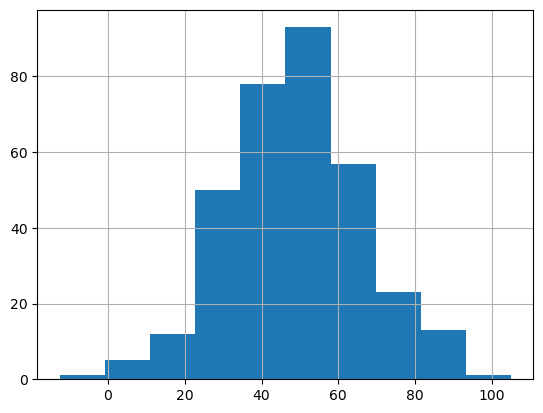

In [23]:
scaled_samples_df_real['BW'].hist()

In [24]:
scaled_samples_df_real['BW'].min()

np.float64(-12.48844092987639)

In [25]:
scaled_samples_df_real['BW'].max()

np.float64(104.9686586507936)

<Axes: >

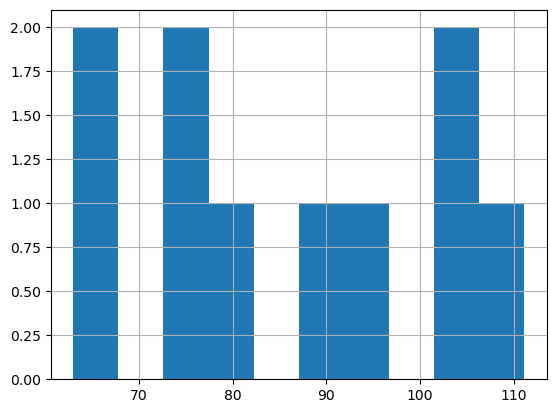

In [26]:
df_adult['BW'].hist()

In [27]:
summaries = df_adult[keep_columns].describe()

In [28]:
summaries.iloc[3]

BW         63.000000
EGPb        2.087400
Gb        135.260000
Ib         83.697165
kabs        0.021419
kmax        0.021870
kmin        0.002838
b           0.627080
d           0.092496
Vg          1.571500
Vi          0.036354
Ipb         4.219397
Vmx         0.016839
Km0       188.770000
k2          0.065641
k1          0.036808
p2u         0.016772
m1          0.118960
m5          0.007059
CL          0.983870
m2          0.163749
m4          0.065499
m30         0.178440
Ilb         1.670413
ki          0.002940
kp2         0.002436
kp3         0.004659
Gpb       225.085945
Gtb        58.508351
Vm0         2.118484
Rdb         2.087400
PCRb        0.014388
kd          0.012900
ksc         0.053600
ka1         0.001900
ka2         0.007800
u2ss        1.110442
isc1ss     55.801128
isc2ss     47.894520
kp1         3.562132
Name: min, dtype: float64

In [29]:
scaled_samples_df_real[keep_columns].describe()

,BW,EGPb,Gb,Ib,kabs,kmax,kmin,b,d,Vg,...,Rdb,PCRb,kd,ksc,ka1,ka2,u2ss,isc1ss,isc2ss,kp1
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,...,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,48.562298,3.544472,154.668949,129.857973,0.245945,0.033078,0.008821,0.911641,0.106385,1.629753,...,3.544472,0.023101,0.020277,0.118315,0.004653,0.019041,2.216160,106.424141,83.980737,6.481122
std,17.286645,0.357299,6.587067,19.456770,0.215646,0.012334,0.003908,0.125169,0.062419,0.170041,...,0.357299,0.002343,0.002199,0.033796,0.000892,0.005566,0.486789,37.318764,52.744000,1.205158
min,-12.488441,2.655244,137.794974,81.731148,-0.284647,-0.016170,-0.001761,0.619974,-0.078764,1.105084,...,2.655244,0.017206,0.013217,0.031105,0.002313,0.002595,0.751936,-6.687521,-118.519745,3.429358
25%,37.758111,3.306635,149.830322,115.632812,0.111708,0.025801,0.006348,0.820271,0.065634,1.524317,...,3.306635,0.021545,0.018761,0.096254,0.004025,0.014962,1.911592,82.733045,48.779691,5.655176
50%,48.263251,3.510427,154.272898,130.705124,0.235763,0.033949,0.008807,0.902288,0.103793,1.641941,...,3.510427,0.022922,0.020266,0.116156,0.004650,0.018941,2.194870,104.967865,83.011793,6.409343
75%,59.457665,3.760251,159.007422,141.297148,0.398767,0.041414,0.011438,0.996106,0.150890,1.735844,...,3.760251,0.024537,0.021610,0.137580,0.005252,0.022752,2.515654,130.582226,119.775778,7.094395
max,104.968659,4.684939,174.195454,190.370027,1.108119,0.065782,0.021079,1.361829,0.275688,2.086939,...,4.684940,0.030686,0.028817,0.220067,0.008036,0.044762,3.784129,231.542113,234.322263,10.697603


In [30]:
scaled_samples_df_real.to_csv('/home/cjrisi/Projects/diabetes/simglucose/simglucose/params/vpatient_params_sim.csv', index=False)